In [3]:
import sys
sys.path.append('..')
import plotsettings
import numpy as np
import numpy.random as npr
import pandas as pd
import matplotlib.pyplot as plt
import math
import simtf
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


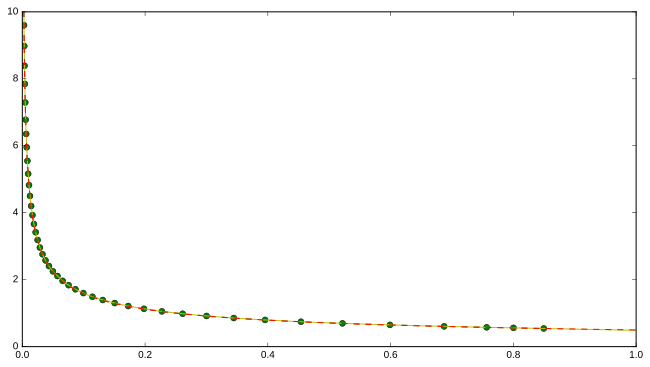

In [124]:
MIN_X = 0.001
MAX_X = 1.0
COUNT = 1000000

def probability_func(x):
#     return math.sqrt(2*x)
    return x*x

rand_vec = np.vectorize(probability_func)(
    npr.uniform(MIN_X, MAX_X, COUNT)
)

hist = simtf.histogram(
    pd.Series(rand_vec),
#     rand_vec,
    type='window',
#     type='window_2',
#     type='means',
#     type='discrete',
#     logscale=False,
    logscale=True,
    n_bins=100,
    n_points=100,
    window_size=0.05,
)

spline_func = simtf.cubic_spline(
    xi=hist['mean'].as_matrix(),
    yi=hist['n_delta_normalized'].as_matrix(),
#     logscale=True,
    logscale=False,
)

# x = np.linspace(MIN_X, MAX_X, 100)
x = np.logspace(math.log(MIN_X), math.log(MAX_X), 100, True, base=math.exp(1.0))
y = np.vectorize(spline_func)(x)
y1 = 0.5/np.sqrt(x)

# plt.xlim([MIN_X, MAX_X])
plt.ylim([0, 10])
# plt.xscale('log')
# plt.yscale('log')

plt.plot(hist['mean'], hist['n_delta_normalized'], 'go--')
plt.plot(x, y, 'y')
plt.plot(x, y1, 'r--')
plt.show()

In [62]:
spline_func(1)

0.49691604372500103

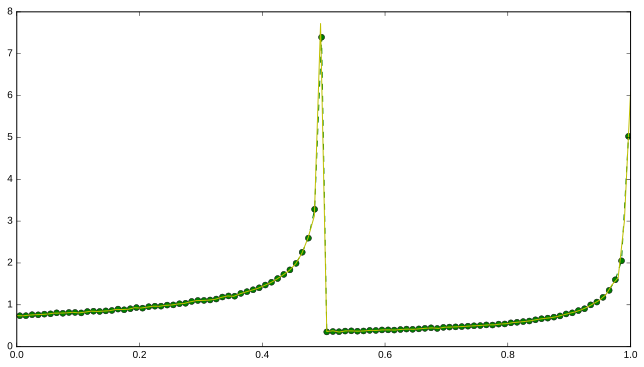

In [94]:
MIN_X = 0.0
MAX_X = 1.0
COUNT = 1000000

def probability_func(x):
#     return 0.25*(2*x+1)*(1-2*x)*(1+np.sign(0.5-x)) + (0.25+0.25*(1-2*x)*(2*x-3))*(1+np.sign(x-0.5))
    return x*(2-4*x)*(1+np.sign(0.5-x)) + 4*(1-x)*(2*x-1)*(1+np.sign(x-0.5))

rand_vec = np.vectorize(probability_func)(
    npr.uniform(MIN_X, MAX_X, COUNT)
)

hist = simtf.histogram(
    pd.Series(rand_vec),
#     rand_vec,
#     type='window',
#     type='window_2',
    type='means',
#     type='discrete',
    logscale=False,
#     logscale=True,
    n_bins=100,
    n_points=100,
    window_size=0.05,
)

spline_func = simtf.cubic_spline(
    xi=hist['mean'].as_matrix(),
    yi=hist['n_delta_normalized'].as_matrix(),
#     logscale=True,
    logscale=False,
)

x = np.linspace(MIN_X, MAX_X, 100)
# x = np.logspace(math.log(MIN_X), math.log(MAX_X), 100, True, base=math.exp(1.0))
y = np.vectorize(spline_func)(x)
# y1 = x*(2-4*x)
# y2 = 8*(1-2*x)*(x-1)
# y3 = x*(1+np.sign(0.5-x)) + (1-x)*(1+np.sign(x-0.5))
# y3 = 0.25*(2*x+1)*(1-2*x)*(1+np.sign(0.5-x)) + (0.25+0.25*(1-2*x)*(2*x-3))*(1+np.sign(x-0.5))
# y3 = x*(2-4*x)*(1+np.sign(0.5-x)) + 4*(1-x)*(2*x-1)*(1+np.sign(x-0.5))

# plt.xlim([MIN_X, MAX_X])
# plt.ylim([0, 1])
# plt.xscale('log')
# plt.yscale('log')

plt.plot(hist['mean'], hist['n_delta_normalized'], 'go--')
plt.plot(x, y, 'y')
# plt.plot(x, y1, 'r--')
# plt.plot(x, y2, 'g--')
# plt.plot(x, y3, 'm:')
plt.show()